In [82]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import os

In [81]:
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df.count()
ride_data_df.count()

city_data_df.isnull().sum()
ride_data_df.isnull().sum()

city_data_df.dtypes
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [83]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [84]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]

urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]

urban_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]

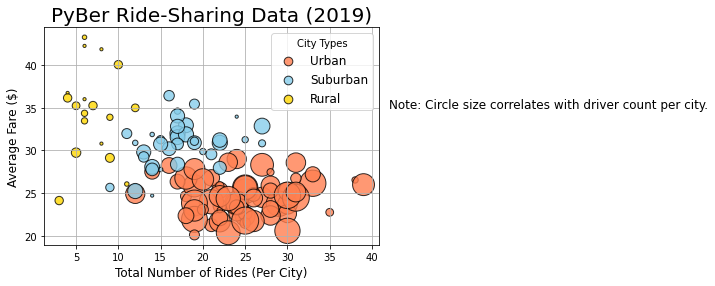

In [85]:
plt.scatter(urban_ride_count,
            urban_avg_fare,
            c="coral",
            edgecolors="k",
            linewidth=1,
            alpha=0.8,
            s=10*urban_driver_count,
            label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            c="skyblue",
            edgecolors="k",
            linewidth=1,
            alpha=0.8,
            s=10*suburban_driver_count,
            label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            c="gold",
            edgecolors="k",
            linewidth=1,
            alpha=0.8,
            s=10*rural_driver_count,
            label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)

plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)

plt.grid(True)

lgnd = plt.legend(fontsize=12, mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig("analysis/Fig1.png")

plt.show()

In [96]:
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count:.2f}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [100]:
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [103]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban trips is {mean_urban_drivers:.2f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban trips is {median_urban_drivers:.2f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban trips is {mode_urban_drivers}.")

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban trips is {mean_suburban_drivers:.2f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {median_suburban_drivers:.2f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban trips is {mode_suburban_drivers}.")

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural trips is {mean_rural_drivers:.2f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {median_rural_drivers:.2f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {mode_rural_drivers}.")

The mean number of drivers for urban trips is 36.68.
The median number of drivers for urban trips is 37.00.
The mode number of drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean number of drivers for suburban trips is 13.71.
The median number of drivers for suburban trips is 16.00.
The mode number of drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean number of drivers for rural trips is 4.30.
The median number of drivers for rural trips is 4.00.
The mode number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


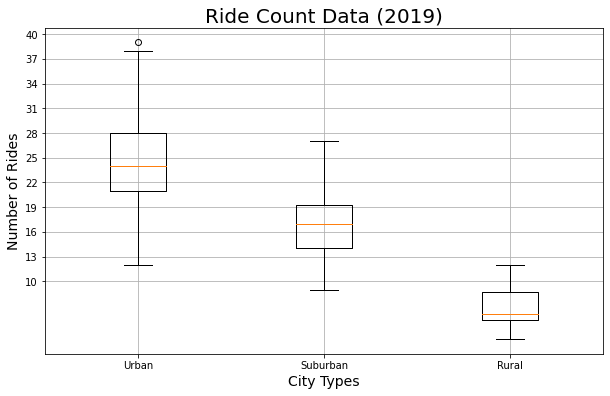

In [107]:
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(10, 41, step=3.0))

ax.grid()

plt.savefig("analysis/Fig2.png")

plt.show()

In [108]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


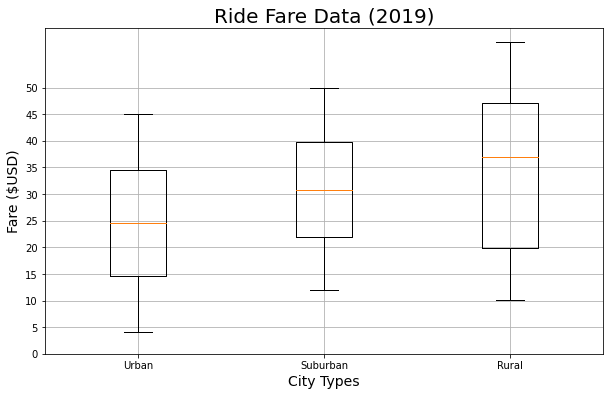

In [111]:
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(ride_fare_data, labels=x_labels)

ax.set_yticks(np.arange(0, 55, step=5.0))

ax.grid()

plt.savefig("analysis/Fig3.png")

plt.show()

In [ ]:
x_labels = ["Urban", "Suburban", "Rural"]
ride_driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(ride_driver_data, labels=x_labels)

ax.set_yticks(np.arange(0, 55, step=5.0))

ax.grid()

plt.savefig("analysis/Fig3.png")

plt.show()